# 라이브러리 설치 및 Import

In [6]:
!pip3 install pandas
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import pandas as pd
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# 함수 모음

In [7]:
# csv file -> DataFrame
def reading_csv(file_path):
    encodings = ['cp949', 'utf-8', 'ISO-8859-1', 'cp1252']  # 인코딩 리스트
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            return df  # or process your df
        except: pass
    return None

# 산개된 x_set, y_set 데이터 -> 일차함수 추세선
def draw_graph(x_set, y_set, title="Title", x_key = "X", y_key = "Y"):
    # 그래프 스타일 설정
    plt.style.use('tableau-colorblind10')  # 세련된 그리드 스타일 사용

    # numpy 배열로 변환
    x = np.array(x_set)
    y = np.array(y_set)

    # LOWESS 스무딩으로 추세선 계산
    smoothed = lowess(y, x, frac=0.1, it=3)

    # 추세선 그리기 (부드러운 곡선)
    plt.plot(smoothed[:, 0], smoothed[:, 1], 'r', label='Trend line', linewidth=2)

    # 원래 데이터 포인트 그리기
    plt.scatter(x, y, color='blue', label='Data points', edgecolors='w', s=50, alpha=0.7)

    # 그래프 설정
    plt.xlabel(x_key)
    plt.ylabel(y_key)
    plt.title(title)
    plt.legend()

    # 그래프 보여주기
    plt.show()


# 투수 유형 조회

In [8]:
PATH_PLAYER_STATS_CSV = 'csv_data/player_stats.csv'

df_stats = reading_csv(PATH_PLAYER_STATS_CSV)
df_stats


,YEAR,RATE_2Seam,RATE_4Seam,RATE_Cutt,RATE_Curv,RATE_Slid,RATE_Chan,RATE_Sink,RATE_Fork,RATE_Knuc,...,SPEED_4Seam,SPEED_Cutt,SPEED_Curv,SPEED_Slid,SPEED_Chan,SPEED_Sink,SPEED_Fork,SPEED_Knuc,SPEED_Other,WAR
0,2013,0.0,58.9,0.4,5.1,22.6,12.3,0.0,0.0,0.0,...,139.8,134.0,118.1,127.6,125.8,0.0,0.0,0.0,90.6,6.44
1,2015,0.0,60.9,0.0,4.2,20.6,13.2,0.0,0.0,0.0,...,137.9,0.0,120.1,127.3,122.0,0.0,0.0,0.0,0.0,1.57
2,2016,0.1,51.4,0.0,7.3,24.0,17.2,0.0,0.0,0.0,...,135.9,0.0,118.5,127.3,122.3,0.0,0.0,0.0,0.0,0.13
3,2020,0.0,55.1,0.0,9.6,27.8,7.5,0.0,0.0,0.0,...,138.5,0.0,116.1,125.1,127.9,0.0,0.0,0.0,0.0,-0.09
4,2021,0.0,47.3,0.0,2.8,36.4,13.5,0.0,0.0,0.0,...,139.4,0.0,116.8,129.6,128.5,0.0,0.0,0.0,0.0,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2019,0.0,61.0,0.0,0.0,36.8,2.0,0.3,0.0,0.0,...,146.3,0.0,0.0,133.1,133.4,144.3,0.0,0.0,0.0,1.10
435,2020,0.0,57.8,0.0,0.0,34.1,6.4,1.6,0.0,0.0,...,144.6,0.0,142.0,130.3,129.3,141.1,0.0,0.0,0.0,2.33
436,2021,0.0,55.9,0.0,0.0,34.2,9.0,0.8,0.0,0.0,...,144.2,0.0,0.0,129.2,130.9,142.5,0.0,0.0,0.0,1.93
437,2022,0.1,60.9,0.0,0.1,23.1,8.4,2.1,5.0,0.0,...,145.4,0.0,126.0,130.4,131.9,145.9,133.5,0.0,0.0,1.15


# 4심 패스트볼 구속 별 성적

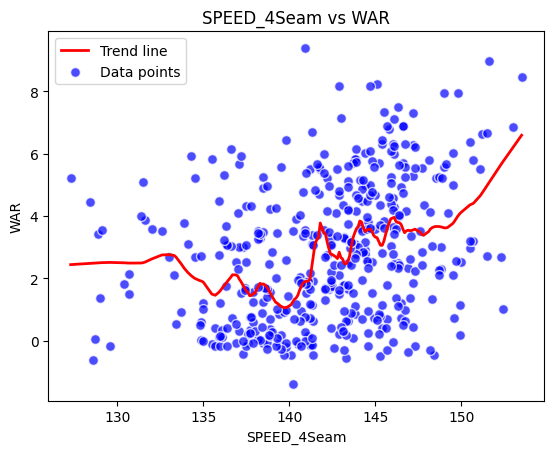

In [9]:
x_key, y_key = 'SPEED_4Seam', 'WAR'
x_set, y_set = [], []

for x,y in zip(df_stats[x_key], df_stats[y_key]):
    if x > 0:
        x_set.append(x)
        y_set.append(y)
title = f"{x_key} vs {y_key}"
draw_graph(x_set, y_set, x_key=x_key, y_key=y_key,title=title)